In [1]:
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\projects\mini-project-IV\src")
from silvhua_plot import *

import pandas as pd
from silvhua import *
import plotly
import numpy as np
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import plotly.graph_objects as go

# Loan predictions
# Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
| ------------- |-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



# Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

# 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

# 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [28]:
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\mini-project-IV\data'
filename = 'data.csv'
df = load_csv(filename, path, column1_as_index=True)

In [3]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Loan_Status'), df['Loan_Status'], 
    train_size=0.8,random_state=0)
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
LP001316,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban
LP002729,Male,No,1,Graduate,No,11250,0.0,196.0,360.0,NaN,Semiurban
LP002448,Male,Yes,0,Graduate,No,3948,1733.0,149.0,360.0,0.0,Rural
LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban
LP001877,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
LP001904,Male,Yes,0,Graduate,No,3103,1300.0,80.0,360.0,1.0,Urban
LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban
LP002160,Male,Yes,3+,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban
LP001657,Male,Yes,0,Not Graduate,No,6033,0.0,160.0,360.0,1.0,Urban


In [10]:
df['Loan_Status'].value_counts()
# df['Credit_History'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [350]:
#Create lists of categorical and numeric features
categorical_features = list(set(df.dtypes[df.dtypes == 'object'].index.tolist()) - set(['Loan_Status'])) + ['Credit_History'] 
numeric_features = list(set(df.columns) - set(categorical_features) - set(['Loan_Status']))
print(categorical_features, len(categorical_features))
print(numeric_features, len(numeric_features))
df.shape

['Married', 'Property_Area', 'Education', 'Dependents', 'Gender', 'Self_Employed', 'Credit_History'] 7
['CoapplicantIncome', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term'] 4


(614, 12)

In [301]:
# Function to plot multiple histograms using Plotly. Show different colours based on classification.
def plot_int_hist(df, columns=None, color=None, label=1):
    """
    Use Plotly to plot multiple histograms using the specified columns of a dataframe.
    Arguments:
    - df: Dataframe.
    - columns (optional): Columns of dataframe on which to create the histogram. If blank, all numeric data will be plotted.
    - color (optional): Provide name of colum containing binary classification values 0 and 1. 
        Data points classified as 1 will be in red.
    - label (optional): Label of classification column. Default is 1.
    
    Make sure to do the following imports:
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    """
    # import plotly.express as px
    import plotly.graph_objects as go
    import plotly 
    from plotly.subplots import make_subplots

    if columns == None:
        columns = df.dtypes[df.dtypes != 'object'].index.tolist()
    fig = make_subplots(rows=round((len(columns)+.5)/2), cols=2,subplot_titles=columns)
    for i, feature in enumerate(columns):
        if color:
            bins = dict(
                start = min(df[feature]),
                end =  max(df[feature]),
                # size=
            )
            zero = df[df[color] != label]
            one = df[df[color] == label]
            fig.add_trace(go.Histogram(x=zero[feature],
                marker_color='blue',
                opacity=0.5,
                xbins=bins), 
                row=i//2+1, col=i % 2 + 1
                )
            fig.add_trace(go.Histogram(x=one[feature],
                marker_color='red',
                opacity=0.5,
                xbins=bins),
                row=i//2+1, col=i % 2 + 1)
        else:
            fig.add_trace(go.Histogram(x=df[feature]), 
            row=i//2+1, col=i % 2 + 1)

    if color:
        title = f'Observations with {color} of value {label} are indicated in red'
    else:
        title = 'Value counts'
    fig.update_layout(height=300*round((len(columns)+.5)/2), 
        showlegend=False,barmode='overlay',
        title=title,
        title_x=0.5,
        title_xanchor='center',
        title_y = 0,
        title_yanchor = 'bottom')
    fig.show()

# Function to plot multiple histograms using Plotly. Show different colours based on classification.
def plot_int_bar(df, columns=None, color=None, label=1, barmode='stack'):
    """
    Use Plotly to plot multiple histograms using the specified columns of a dataframe.
    Arguments:
    - df: Dataframe.
    - columns (optional): Columns of dataframe on which to create the histogram. If blank, all numeric data will be plotted.
    - color (optional): Provide name of colum containing binary classification values 0 and 1. 
        Data points classified as 1 will be in red.
    - label (optional): Label of classification column. Default is 1.
    - barmode ('stack', 'group', or 'overlay'; optional): How the different will be shown. Default is 'stack'.

    """
    # import plotly.express as px
    import plotly.graph_objects as go
    import plotly 
    from plotly.subplots import make_subplots

    if columns == None:
        columns = df.dtypes[df.dtypes != 'object'].index.tolist()
    fig = make_subplots(rows=round((len(columns)+.5)/2), cols=2,subplot_titles=columns)
    for i, feature in enumerate(columns):
        if color:
            zero = df[df[color] != label]
            one = df[df[color] == label]
            fig.add_trace(go.Histogram(x=zero[feature],
                marker_color='blue',
                opacity=0.5), 
                row=i//2+1, col=i % 2 + 1
                )
            fig.add_trace(go.Histogram(x=one[feature],
                marker_color='red',
                opacity=0.5),
                row=i//2+1, col=i % 2 + 1)
        else:
            fig.add_trace(go.Histogram(x=df[feature]), 
            row=i//2+1, col=i % 2 + 1)
    
    if color:
        title = f'Observations with {color} of value {label} are indicated in red'
    else:
        title = 'Value counts'
    fig.update_layout(height=300*round((len(columns)+.5)/2), 
        showlegend=False,barmode=barmode,
        bargap=0.1,
        title = title,
        title_x=0.5,
        title_xanchor='center',
        title_y = 0,
        title_yanchor = 'bottom')
    fig.show()

def correlation_plot(df):
    """
    Plot the correlation matrix.
    Returns the dataframe with the correlation values.
    """

    # Create a mask to exclude the redundant cells that make up half of the graph.
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))

    # Create the heatmap with the mask and with annotation
    sns.heatmap(data=abs(df.corr(numeric_only=True)),mask=mask,annot=True)
    return df.corr()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Loan_Amount_Term
ApplicantIncome,1.000000,0.570909,-0.116605,-0.045306
LoanAmount,0.570909,1.000000,0.188619,0.039447
CoapplicantIncome,-0.116605,0.188619,1.000000,-0.059878
Loan_Amount_Term,-0.045306,0.039447,-0.059878,1.000000


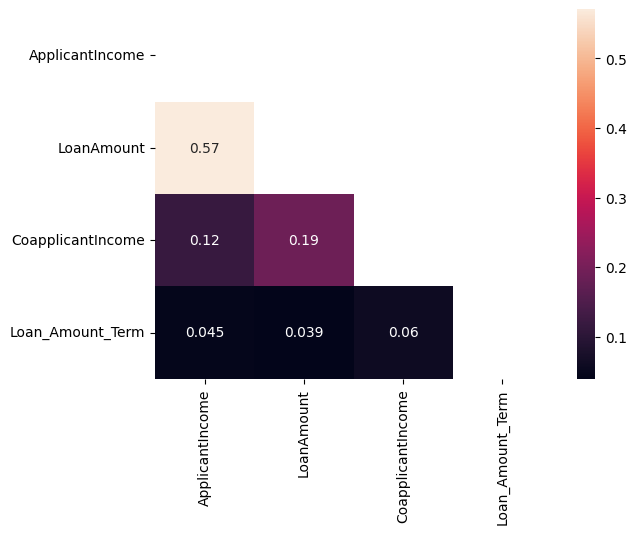

In [79]:
correlation_plot(df[numeric_features])

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [75]:
print(df.shape)
explore(df)

(614, 12)
Unique IDs: 3. # of rows: 614. Match: False



,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000


Look at some basic statistics for numerical variables.

In [91]:
# Distribution of numerical features showing loan status
plot_int_hist(df, numeric_features, 'Loan_Status', label='N')

In [312]:
# Distributions of 'LoanAmount','Loan_Amount_Term' showing loan status
plot_int_hist(df, ['LoanAmount','Loan_Amount_Term'], 'Loan_Status', label='N')

In [74]:
df[numeric_features].describe()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Loan_Amount_Term
count,614.000000,592.000000,614.000000,600.00000
mean,5403.459283,146.412162,1621.245798,342.00000
std,6109.041673,85.587325,2926.248369,65.12041
min,150.000000,9.000000,0.000000,12.00000
25%,2877.500000,100.000000,0.000000,360.00000
50%,3812.500000,128.000000,1188.500000,360.00000
75%,5795.000000,168.000000,2297.250000,360.00000
max,81000.000000,700.000000,41667.000000,480.00000


In [160]:
# What are the unique values for Loan_Amount_Term?
df['Loan_Amount_Term'].value_counts().sort_index()

12.0       1
36.0       2
60.0       2
84.0       4
120.0      3
180.0     44
240.0      4
300.0     13
360.0    512
480.0     15
Name: Loan_Amount_Term, dtype: int64

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [65]:
plot_int_bar(df, categorical_features, 'Loan_Status', label='N')

In [285]:
# Does self employment status increase the income requirement for loan approval?

pivot = df.pivot_table('ApplicantIncome',columns=['Gender'], index=['Loan_Status'],aggfunc='count')
pivot

Gender,Female,Male
Loan_Status,,
N,37,150
Y,75,339


In [26]:
# Function to plot bar charts where data are normalized for each group. Show different colours based on classification.
def plot_proportion(df, columns=None, classication='Loan_Status', label='Y', barmode='stack'):
    """
    Use Plotly to plot bar charts where data are normalized for each group. 
    Show different colours based on classification.
    Arguments:
    - df: Dataframe.
    - columns (optional): Columns of dataframe containing the categorical variables to plot. 
        If blank, all categorical data will be plotted.
    - classication: Provide name of colum containing binary classification values. 
        Data points classified as 1 will be in red.
    - label (optional): Label of classification column. Default is 1.
    - barmode ('stack', 'group', or 'overlay'; optional): How the different will be shown. Default is 'stack'.

    """
    if columns == None:
        columns = df.dtypes[df.dtypes == 'object'].index.tolist()
    fig = make_subplots(rows=round((len(columns)+.5)/2), cols=2,subplot_titles=columns)
    for i, feature in enumerate(columns):
        pivot = df.pivot_table(df.columns[-1], index=[classication], columns=[feature],aggfunc='count')
        zero_label = list(set(pivot.index)-set(label))[0]
        zero = pivot.loc[zero_label,:]/pivot.sum()*100
        yes = pivot.loc[label,:]/pivot.sum()*100
        # print(pivot)
        fig.add_trace(go.Bar(x=pivot.columns,
            y=zero,
            marker_color='blue',
            opacity=0.5), 
            row=i//2+1, col=i % 2 + 1
            )
        fig.add_trace(go.Bar(x=pivot.columns,
            y=yes,
            marker_color='red',
            opacity=0.5),
            row=i//2+1, col=i % 2 + 1)
    

    title = f'Percentage with {classication} of value {label} by category (indicated in red).'

    fig.update_layout(height=500*round((len(columns)+.5)/2), 
        showlegend=False,barmode=barmode,
        bargap=0.1,
        title = title,
        title_x=0.5,
        title_xanchor='center',
        # title_y = .96,
        title_yanchor = 'bottom')
    fig.show()

# plot_proportion(df, columns=categorical_features, classication='Loan_Status', label='N', barmode='stack')

In [317]:
# Loan status distribution by gender and property_area
plot_proportion(df, columns=['Gender','Property_Area',], 
    classication='Loan_Status', label='N', barmode='stack')

In [318]:
# Loan status distribution by married, and dependents
plot_proportion(df, columns=['Married','Dependents'], 
    classication='Loan_Status', label='N', barmode='stack')

In [319]:
# Loan status distribution by education and self_employed
plot_proportion(df, columns=['Education', 'Self_Employed'], 
    classication='Loan_Status', label='N', barmode='stack')

In [320]:
# Loan status distribution by credit_history
plot_proportion(df, columns=['Credit_History'], 
    classication='Loan_Status', label='N', barmode='stack')

In [323]:
# Function to plot multiple box plots
def plot_box(df, columns=None,category=None, hue=None):
    """
    Plot multiple histograms using the specified columns of a dataframe.
    Arguments:
    - df: Dataframe.
    - columns (optional): Columns of dataframe on which to create the histogram. If blank, 
        all numeric data will be plotted.
    - category (optional): Categorical feature for y-axis of box plot. If None, 
        only one box will be plotted per dependent variable.
    - hue (optional): Categorical feature by which to split the box plots.

    """
    if columns == None:
        columns = df.dtypes[df.dtypes != 'object'].index.tolist()
    nrows = round((len(columns)+.5)/2)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,nrows*2))
    for i, feature in enumerate(columns):
        if (category != None) & (hue !=None):
            sns.boxplot(data=df,x=feature,y=category,ax=ax[i//2, i % 2], hue=hue)
        elif category:
            sns.boxplot(data=df,x=feature,y=category,ax=ax[i//2, i % 2])
        else:
            sns.boxplot(data=df,x=feature,ax=ax[i//2, i % 2])
    plt.tight_layout()

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



In [51]:
# Function to make an interactive histogram combined with a box plot (or violin or rug plot).
def hist_box(df, column=None, marginal='box', color=None):
    """
    Make an interactive histogram combined with a box plot (or violin or rug plot).
    Parameters:
    - column: Column name to plot.
    - color (optional): Column for grouping data. If argument is provided, barmode is 'overlay'.
    - marginal ('box', 'violin', or 'rug'): The second type of plot to include.
    """
    fig = px.histogram(df, x=column, color=color,
        marginal=marginal, # or violin, rug
        opacity=0.5,
        hover_data=df.columns,
        barmode='overlay')
    fig.update_layout(height=300)
    fig.show()

In [129]:
hist_box(df, column='ApplicantIncome', color='Loan_Status')


Look at box plots to understand the distributions. 

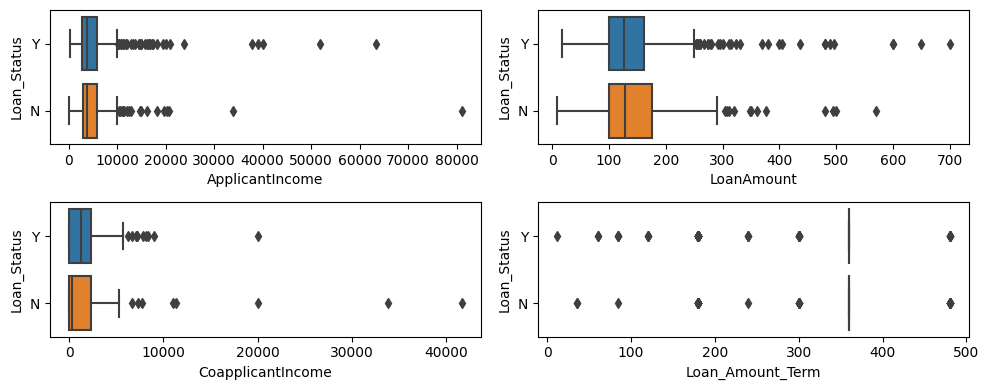

In [111]:
plot_box(df, columns=numeric_features,category='Loan_Status')
# Loan approval appears associated with higher coapplicant income 
# Loan approval status does not appear to be associated with differences in other numerical features

Look at the distribution of income segregated  by `Education`

In [96]:
import plotly.express as px
fig = px.histogram(df, x="ApplicantIncome", color="Education",
                   marginal="box", # or violin, rug
                   opacity=0.5,
                   hover_data=df.columns,
                   barmode='overlay')
fig.show()

Look at the histogram and boxplot of LoanAmount

In [118]:
hist_box(df, column='LoanAmount', color='Loan_Status')

In [119]:
hist_box(df, column='LoanAmount')

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

#### *Self-employment*

In [186]:
# Does self employment status increase the income requirement for loan approval?

pivot = df.pivot_table('ApplicantIncome', columns=['Self_Employed'], index=['Loan_Status'])
pivot

Self_Employed,No,Yes
Loan_Status,,
N,5397.592357,6081.076923
Y,4890.530612,7984.267857


In [189]:
pivot.sum()

Self_Employed
No     10288.122969
Yes    14065.344780
dtype: float64

In [130]:
# Compare income between employed and self-employed
hist_box(df, column='ApplicantIncome', color='Self_Employed')

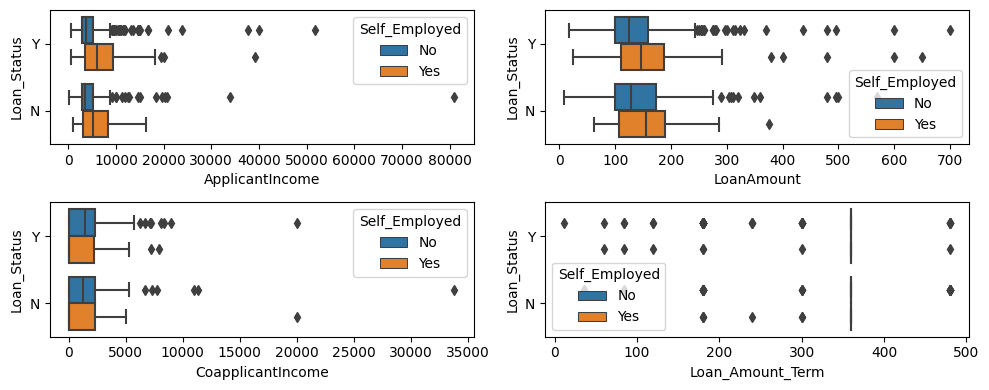

In [136]:
plot_box(df, columns=numeric_features,category='Loan_Status', hue='Self_Employed')

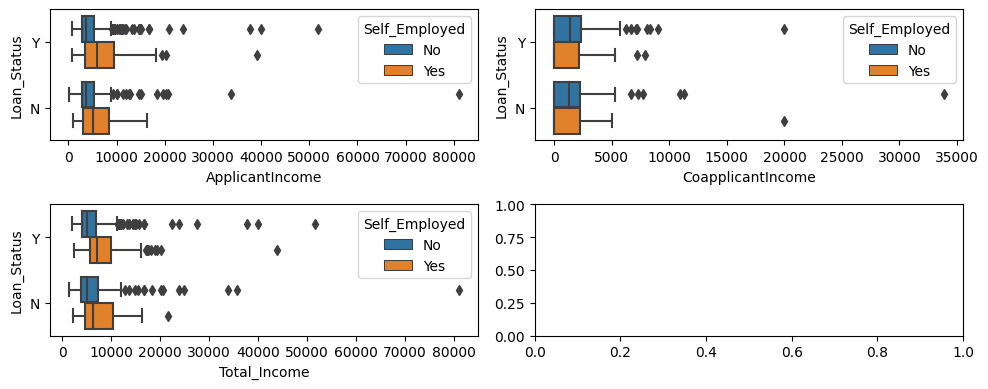

In [332]:
plot_box(df, columns=['ApplicantIncome', 'CoapplicantIncome','Total_Income'],category='Loan_Status', hue='Self_Employed')

#### *Credit History*

In [131]:
# How does credit history impact income requirement for loan status
df.pivot_table('ApplicantIncome', index=['Credit_History'], columns=['Loan_Status'])
# Applicants without credit history need higher income for loan approval.

Loan_Status,N,Y
Credit_History,,
0.0,5382.841463,9153.857143
1.0,5613.927835,5378.436508


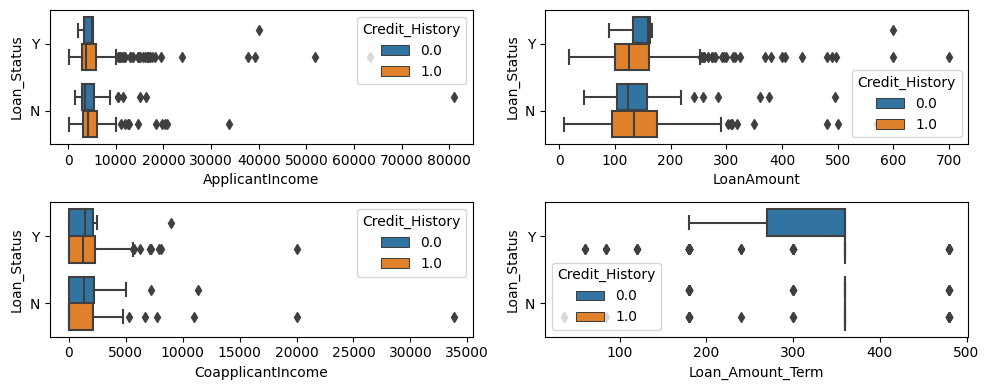

In [135]:
plot_box(df, columns=numeric_features,category='Loan_Status', hue='Credit_History')
# Among applicants without credit history:
    # Loan approval associated with higher income
    # LoanAmount is higher
    # Higher coapplicant income associated with higher loan approval rate.

#### *Education*

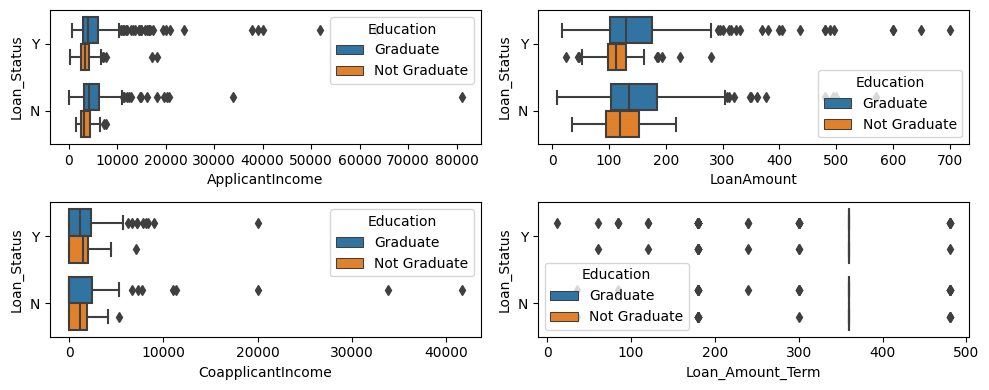

In [137]:
plot_box(df, columns=numeric_features,category='Loan_Status', hue='Education')
# No obvious interaction effect of education and applicant income

In [156]:
# How does education impact loan approval rate
df.pivot_table(values='ApplicantIncome',columns=['Education'], index=['Loan_Status'], aggfunc='count',margins='All')
# Would need to convert these into percentages to compare unequal group sizes

Education,Graduate,Not Graduate,All
Loan_Status,,,
N,140,52,192
Y,340,82,422
All,480,134,614


In [149]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

#### *Married*

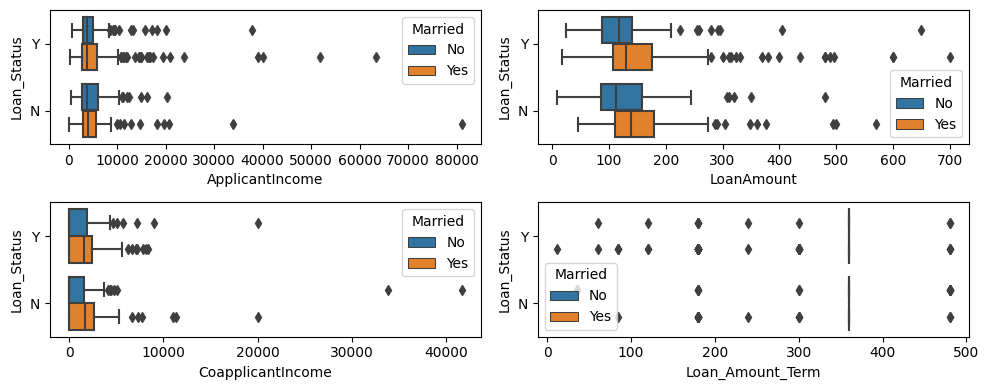

In [157]:
plot_box(df, columns=numeric_features,category='Loan_Status', hue='Married')
# No obvious interaction between marriage status and applicant income

#### *Property area*

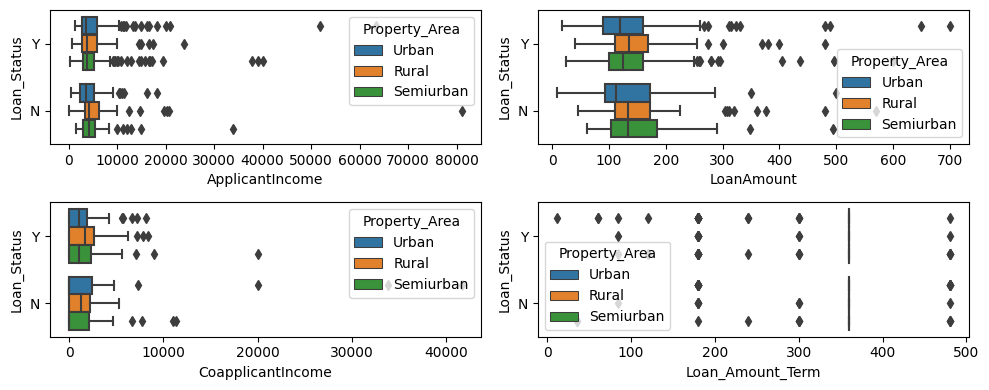

In [158]:
plot_box(df, columns=numeric_features,category='Loan_Status', hue='Property_Area')
# No obvious effect of property area on loan approval
# Rural applicants have higher loan amounts

# 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [161]:
explore(df)

Unique IDs: 3. # of rows: 614. Match: False



,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000


In [262]:
# Create a custom class to impute mean for a specified group # SH 2022-11-03 20:42 not working 
from sklearn.base import BaseEstimator, TransformerMixin

class GroupMeanImputer(BaseEstimator, TransformerMixin):
    """
    Parameters:
    agg (string): Aggregate function. Default is 'mean'. 
        Other options include: 'mode'.
    """
    def __init__(self, impute_col, group_col, agg='mean'):
        # Your __init__ function takes in arguments as input
        # and does some initialization, such as creating model parameters.
        
        # Store class arguments
        self.impute_col = impute_col
        self.group_col = group_col
        if agg=='mode':
            agg=pd.Series.mode
        self.agg = agg
        # Initialize our parameters
        self.group_means = None

    def fit(self, X, y = None):
        # Your fit() function takes in an X (and optionally a y)
        # and fits its parameters to the data. It then returns "self".
        
        # Compute the mean of `impute_col` for each unique value in `group_col`
        self.group_means = X.groupby(self.group_col)[self.impute_col].agg(self.agg)
        
        return self

    def transform(self, X, y = None):
        # Your transform() function takes in an X (and optionally a y)
        # and spits out the transformed output.
        
        # For each row, check if `impute_col` is missing (i.e. NaN).
        # If it is, fetch the mean for its group and use that to
        # fill the missing value.

        def replace_with_group(row):
            impute_val = row[self.impute_col]
            group_val = row[self.group_col]
            if np.isnan(impute_val):
                return self.group_means[group_val]
            else:
                return impute_val
        
        X = X.copy()  # Don't modify the original variable that was passed in
        X[self.impute_col] = X.apply(replace_with_group, axis='columns')

        return X

*My ideas for how to fill missing values*
* Credit history: Fill with zero

Fill with mode:
* Self employed
* Loan_Amount_Term
* Gender

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

Combine both incomes as total income and take a log transformation of the same.

In [171]:
# Log of loan amount
df['LoanAmount_log'] = df['LoanAmount'].apply(np.log)

# Total income and log of total income
df['total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['total_income_log'] = df['total_income'].apply(np.log)
raw_vs_transformed_columns = ['LoanAmount', 'LoanAmount_log',
    'total_income','total_income_log'
]

In [173]:
# Raw vs. log transformed
plot_int_hist(df,raw_vs_transformed_columns)

In [25]:
# # SH 2022-11-03 22:02 Create a function to create log transformations of Total_Income and LoanAmount
# def transform_features(df):
#     """
#     - Returns a dataframe with:
#         - Log of the Total_Income
#         - Log of the LoanAmount
#         - Transformed features dropped
#     """
#     # Log of loan amount
#     df.loc[:,'LoanAmount_log'] = df.loc[:,'LoanAmount'].apply(np.log)

#     # Total income and log of total income
#     df.loc[:,'Total_Income'] = df.loc[:,'ApplicantIncome'] + df.loc[:,'CoapplicantIncome']
    
#     transformed_feats = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income']
#     df.loc[:,'Total_Income_log'] = df.loc[:,'Total_Income'].apply(np.log)
#     df = df.drop(columns=transformed_feats)
#     df.columns = df.columns.str.replace('_log', '')
#     return df


In [4]:
# # Create a function to create log transformations of Total_Income and LoanAmount
# def transform_features(df):
#     """
#     - Returns a dataframe with:
#         - Log of the Total_Income
#         - Log of the LoanAmount
#         - Transformed features dropped
#     """
#     # Log of loan amount
#     df['LoanAmount_log'] = df['LoanAmount'].apply(np.log)

#     # Total income and log of total income
#     df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    
#     transformed_feats = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income']
#     df['Total_Income_log'] = df['Total_Income'].apply(np.log)
#     df2 = df.drop(columns=transformed_feats)
#     # df2.columns = df2.columns.str.replace('_log', '')
#     return df2

# df2 = transform_features(df)
# print(df2.shape)
# print(df2.columns)
# print(df.shape)

(614, 11)
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'Total_Income_log'],
      dtype='object')
(614, 15)


### *Custom pipeline function*

In [6]:
# SH 2022-11-04 16:53 update ensure original features are dropped after being transformed
# Create a function to create log transformations of Total_Income and LoanAmount
def transform_features(df):
    """
    - Returns a dataframe with:
        - Log of the Total_Income
        - Log of the LoanAmount
        - Transformed features dropped
    """
    
    # Log of loan amount
    df['LoanAmount_log'] = np.log(df['LoanAmount'].astype('float64')) 

    # Total income and log of total income
    df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    
    transformed_feats = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income']
    df['Total_Income_log'] = np.log(df['Total_Income'].astype('float64')) 

    return df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_Income_log','LoanAmount_log']]

# df2 = transform_features(df)
# print(df2.shape)
# print(df2.columns)
# print(df.shape)

In [51]:
print(df.shape)
df.columns

(614, 12)


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [308]:
plot_int_hist(df, columns=['ApplicantIncome', 'CoapplicantIncome','Total_Income'], 
    color='Loan_Status', label='N')

In [302]:
plot_int_hist(df2, columns=['Total_Income'], color='Loan_Status', label='N')

In [326]:
# Applicant income 
hist_box(df, column='ApplicantIncome', color='Loan_Status')

In [328]:
# Coapplicant income 
hist_box(df, column='CoapplicantIncome', color='Loan_Status')

In [ ]:
# Total income 
hist_box(df, column='Total_Income', color='Loan_Status')

# 4. Building a Predictive Model

In [167]:
print(categorical_features, len(categorical_features))
print(numeric_features, len(numeric_features))
df.shape

['Gender', 'Dependents', 'Education', 'Property_Area', 'Married', 'Self_Employed', 'Credit_History'] 7
['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Loan_Amount_Term'] 4


(614, 12)

In [245]:
# Update the list of numeric features to select, since some numeric features were transformed.
numeric_features2 = list(set(df2.dtypes[df2.dtypes != object].index) - set(categorical_features)) 
numeric_features2

['LoanAmount', 'Total_Income', 'Loan_Amount_Term']

,LoanAmount,Total_Income,Loan_Amount_Term,ApplicantIncome,CoapplicantIncome
LoanAmount,1.000000,0.624621,0.039447,0.570909,0.188619
Total_Income,0.624621,1.000000,-0.069948,0.893037,0.342781
Loan_Amount_Term,0.039447,-0.069948,1.000000,-0.045306,-0.059878
ApplicantIncome,0.570909,0.893037,-0.045306,1.000000,-0.116605
CoapplicantIncome,0.188619,0.342781,-0.059878,-0.116605,1.000000


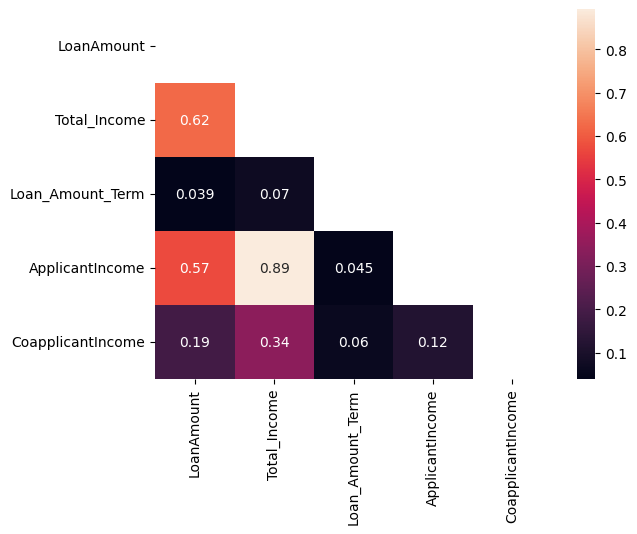

In [339]:
# Correlation plot including total income
correlation_plot(df.filter(['LoanAmount', 'Total_Income', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']))

In [322]:
categorical_features

['Gender',
 'Dependents',
 'Education',
 'Property_Area',
 'Married',
 'Self_Employed',
 'Credit_History']

In [6]:
feature_eng = FunctionTransformer(transform_features)
feature_eng.fit(X_train)
plot_int_bar(feature_eng.transform(X_train))

#### *Pipeline Round 1*

In [59]:
# works! SH 2022-11-03 22:17 
numeric_transform = Pipeline([('impute_mean', SimpleImputer(strategy='mean')), 
                              ('scaling', StandardScaler())])
categorical_fill = ColumnTransformer([
    ('fill_credit_history', SimpleImputer(strategy='constant', fill_value=0), ['Credit_History']), # If credit_history is missing, fill with 0
    ('fill_mode', SimpleImputer(strategy='most_frequent'), ['Self_Employed', 'Gender',
        'Dependents','Married'
    ]),
])

categorical_transform = Pipeline([('impute_categorical', categorical_fill), 
                                  ('one-hot-encode', OneHotEncoder(sparse=False))])

preprocessing = ColumnTransformer([('numeric', numeric_transform, ['LoanAmount_log', 'Total_Income_log', 'Loan_Amount_Term']), 
        ('categorical', categorical_transform, ['Gender',
        'Dependents',
        'Education',
        'Property_Area',
        'Married',
        'Self_Employed',
        'Credit_History'])])

pipeline = Pipeline([
        ('transform', FunctionTransformer(transform_features)), # Get log and calculate total_income
        ('preprocessing', preprocessing), 
        ('model', LogisticRegression())
        ])

pipeline.fit(X_train, y_train)

r2 = pipeline.score(X_test, y_test)
print(f'Test set r^2: {r2}')

Test set r^2: 0.7886178861788617


In [8]:
pipeline

Pipeline(steps=[('transform',
                 FunctionTransformer(func=<function transform_features at 0x000001E51B9CC9D0>)),
                ('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['LoanAmount_log',
                                                   'Total_Income_log',
                                                   'Loan_Amount_Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_categori...
                                                                                                    SimpleImputer(fill_value=0,
                                                                                                                  strategy='constant'),
                                                                                                    ['Credit_History']),
                                                                                                   ('fill_mode',
                                                                                                    SimpleImputer(strategy='most_frequent'),
                                                                                                    ['Self_Employed',
                                                                                                     'Gender',
                                                                                                     'Dependents',
                                                                                                     'Married'])])),
                                                                  ('one-hot-encode',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Dependents',
                                                   'Education', 'Property_Area',
                                                   'Married', 'Self_Employed',
                                                   'Credit_History'])])),
                ('model', LogisticRegression())])

Try paramater grid search to improve the results

In [375]:
params = {
        'model__C': [0.5, 0.75, 1]
    }
grid_lr = GridSearchCV(pipeline, param_grid=params)
grid_lr.fit(X_train, y_train)
print(f'Best grid search score: {grid_lr.best_score_}')
grid_lr.best_estimator_

Best grid search score: 0.76573902288188


Pipeline(steps=[('transform',
                 FunctionTransformer(func=<function transform_features at 0x0000019331FFAE50>)),
                ('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['LoanAmount', 'Total_Income',
                                                   'Loan_Amount_Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_categorical',
                                                                   Col...
                                                                                                    SimpleImputer(fill_value=0,
                                                                                                                  strategy='constant'),
                                                                                                    ['Credit_History']),
                                                                                                   ('fill_mode',
                                                                                                    SimpleImputer(strategy='most_frequent'),
                                                                                                    ['Self_Employed',
                                                                                                     'Gender',
                                                                                                     'Dependents',
                                                                                                     'Married'])])),
                                                                  ('one-hot-encode',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Dependents',
                                                   'Education', 'Property_Area',
                                                   'Married', 'Self_Employed',
                                                   'Credit_History'])])),
                ('model', LogisticRegression(C=0.5))])

In [376]:
grid_lr.best_estimator_.score(X_test, y_test)

0.7886178861788617

In [60]:
# iterate grid search over multiple estimators
classifiers = {
    'logistic': LogisticRegression(),
    'random_forest': RandomForestClassifier(random_state=0)
    }
params = {
    'logistic': {
        'classifier__C': [0.5, 0.75, 1]
        },
    'random_forest': {
        'classifier__max_depth': [3, 4, 5]
        }
    }

grid = dict()

for name, classifier in classifiers.items():
    # Create a new pipeline with classifier as last step
    grid_pipeline = Pipeline(steps=[
        ('transform', FunctionTransformer(transform_features)), # Get log and calculate total_income
        ('preprocessing', preprocessing), 
        ('classifier', classifier)
        ])
    grid[name] = GridSearchCV(grid_pipeline, param_grid=params[name])
    grid[name].fit(X_train, y_train)
    print(grid[name].best_params_)
    print(f'Best grid search score for {name}: {grid[name].best_score_}')
    print(f'Test set score for {name}: {grid[name].score(X_test, y_test)}')
    print('')

{'classifier__C': 0.5}
Best grid search score for logistic: 0.76573902288188
Test set score for logistic: 0.7886178861788617

{'classifier__max_depth': 5}
Best grid search score for random_forest: 0.763718820861678
Test set score for random_forest: 0.7642276422764228



In [11]:
# Save the model
model = grid['random_forest']
path=r'C:\Users\silvh\OneDrive\lighthouse\projects\mini-project-IV'
filename = 'model_random_forest-11-04.sav'
savepickle(model,filename,path=path)


File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/mini-project-IV/model_random_forest-11-04.sav


In [ ]:
pickle.load(open('/Users/silvh/OneDrive/lighthouse/projects/mini-project-IV/model_random_forest.sav'))

# 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

# 6. Deploy your model to cloud and test it with PostMan, BASH or Python

### *Run API on local machine*

In [32]:
json_data = {'Gender': 'Male',
 'Married': 'Yes',
 'Dependents': '2',
 'Education': 'Graduate',
 'Self_Employed': 'No',
 'ApplicantIncome': 2708,
 'CoapplicantIncome': 1167.0,
 'LoanAmount': 97.0,
 'Loan_Amount_Term': 360.0,
 'Credit_History': 1.0,
 'Property_Area': 'Semiurban',
}

In [36]:
json_data = X_test.iloc[9,:].to_dict()
json_data

{'Gender': 'Male',
 'Married': 'Yes',
 'Dependents': '0',
 'Education': 'Graduate',
 'Self_Employed': 'No',
 'ApplicantIncome': 2083,
 'CoapplicantIncome': 3150.0,
 'LoanAmount': 128.0,
 'Loan_Amount_Term': 360.0,
 'Credit_History': 1.0,
 'Property_Area': 'Semiurban'}

In [37]:
import requests
URL = "http://127.0.0.1:5000/predict"
# sending get request and saving the response as response object 

r = requests.post(url = URL, json = json_data) 
r.json()

['Model prediction: Y.',
 {'Meaning of prediction': 'Loan application denial. :( '}]

## *Evaluation metrics*

In [52]:
# create a custom function that provides evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

def evaluate_grid_classifier(search_result, X_test, y_test, X_train, y_train, pos_label='1',model_name='Grid search'):
    """
    Print evaluation metrics of the best classifier estimator found from the grid search.
        * recall
        * precision
        * F1
        * AUC score (only if class labels are integers)
    Plot:
        * confusion matrix
        * ROC (only if class labels are integers)
    Parameters:
    - pos_label (str or int): Class label for positive class. Default is 1.
    - model_name (string, optional): Name of model printing purposes.

    Returns evaluation metrics for test data set as a dictionary
    """
    
    best_model = search_result.best_estimator_

    y_pred = best_model.predict(X_test)
    # print(y_pred)
    y_pred_train = best_model.predict(X_train)

    # Metrics for test data
    recall = recall_score(y_test, y_pred, pos_label=pos_label)
    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    f1score = f1_score(y_test, y_pred, pos_label=pos_label)
    accuracy = accuracy_score(y_test, y_pred)
    metrics = {
        'recall': recall,
        'precision': precision,
        'f1' : f1score,
        'accuracy': accuracy
    }

    # Metrics for training data
    recall_train = recall_score(y_train, y_pred_train, pos_label=pos_label)
    precision_train = precision_score(y_train, y_pred_train, pos_label=pos_label)
    f1score_train = f1_score(y_train, y_pred_train, pos_label=pos_label)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    print(f'\n{model_name} evaluation metrics: \n\tTest data\tTraining data\t\tDifference')
    print(f'Accuracy: \t{100*accuracy:.2f}%\t\t{100*accuracy_train:.2f}%\t\t{100*(accuracy-accuracy_train):.2f}%')
    print(f'Recall: \t{100*recall:.2f}%\t\t{100*recall_train:.2f}%\t\t{100*(recall-recall_train):.2f}%')
    print(f'Precision: \t{100*precision:.2f}%\t\t{100*precision_train:.2f}%\t\t{100*(precision-precision_train):.2f}%')
    print(f'F1: \t\t{100*f1score:.2f}%\t\t{100*f1score_train:.2f}%\t\t{100*(f1score-f1score_train):.2f}%')
    if type(y_test) == 'int':
        auc = roc_auc_score(y_test, y_pred)
        auc_train = roc_auc_score(y_train, y_pred_train)
        print(f'AUC: \t\t{100*auc:.2f}%\t\t{100*auc_train:.2f}%\t\t{100*(auc-auc_train):.2f}%')
        RocCurveDisplay.from_estimator(best_model, X_train, y_train)
        metrics['auc'] = auc
    
    print(f'Best model parameters from randomized search: {search_result.best_params_}')
    ConfusionMatrixDisplay.from_estimator(best_model, X_train, y_train)
    return metrics

In [89]:
pred

{'recall': 0.45454545454545453,
 'precision': 0.625,
 'f1': 0.5263157894736842,
 'accuracy': 0.7804878048780488}


logistic evaluation metrics: 
	Test data	Training data		Difference
Accuracy: 	78.86%		76.58%		2.28%
Recall: 	48.48%		49.69%		-1.20%
Precision: 	64.00%		69.30%		-5.30%
F1: 		55.17%		57.88%		-2.70%
Best model parameters from randomized search: {'classifier__C': 0.5}

random_forest evaluation metrics: 
	Test data	Training data		Difference
Accuracy: 	76.42%		80.04%		-3.62%
Recall: 	42.42%		54.72%		-12.29%
Precision: 	58.33%		76.99%		-18.66%
F1: 		49.12%		63.97%		-14.85%
Best model parameters from randomized search: {'classifier__max_depth': 5}


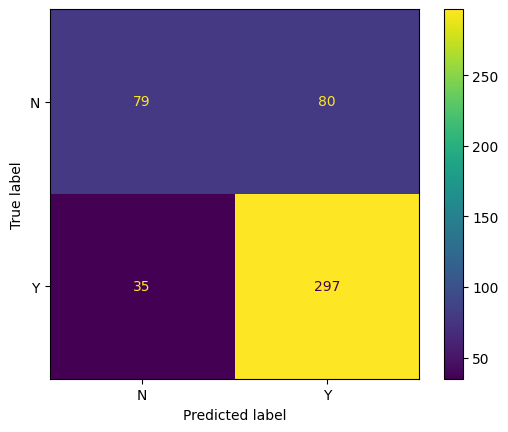

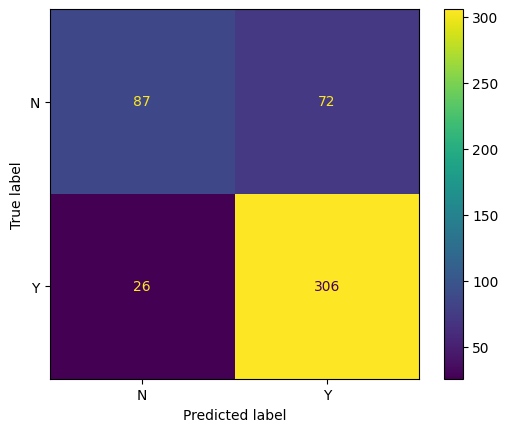

In [61]:
for name, model in grid.items():
    evaluate_grid_classifier(model, X_test, y_test,X_train, y_train,
        pos_label='N',model_name=name)

# Round 2: Use group mean imputing

## Load fresh dataset

In [10]:
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\mini-project-IV\data'
filename = 'data.csv'
data = load_csv(filename, path, column1_as_index=True)

In [14]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data.drop(columns='Loan_Status'), data['Loan_Status'], 
    train_size=0.8,random_state=0)
X_train2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
LP001316,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban
LP002729,Male,No,1,Graduate,No,11250,0.0,196.0,360.0,NaN,Semiurban
LP002448,Male,Yes,0,Graduate,No,3948,1733.0,149.0,360.0,0.0,Rural
LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban
LP001877,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
LP001904,Male,Yes,0,Graduate,No,3103,1300.0,80.0,360.0,1.0,Urban
LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban
LP002160,Male,Yes,3+,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban
LP001657,Male,Yes,0,Not Graduate,No,6033,0.0,160.0,360.0,1.0,Urban


## Fill missing values

In [21]:
explore(X_test2)

Unique IDs: 3. # of rows: 123. Match: False



,Total,Percent
Credit_History,9,0.073171
Self_Employed,4,0.032520
Loan_Amount_Term,3,0.024390
LoanAmount,2,0.016260
Gender,1,0.008130
Married,0,0.000000
Dependents,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000


In [22]:
explore(X_train2)

Unique IDs: 3. # of rows: 491. Match: False



,Total,Percent
Credit_History,41,0.083503
Self_Employed,28,0.057026
LoanAmount,20,0.040733
Dependents,15,0.030550
Gender,12,0.024440
Loan_Amount_Term,11,0.022403
Married,3,0.006110
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000


In [7]:
# Create a custom class to impute mean for a specified group 2022-11-05 7:54 works
from sklearn.base import BaseEstimator, TransformerMixin

class GroupMeanImputer(BaseEstimator, TransformerMixin):
    """
    Parameters:
    agg (string): Aggregate function. Default is 'mean'. 
        Other options include: 'mode'.
    """
    def __init__(self, impute_col, group_col, agg='mean'):
        # Your __init__ function takes in arguments as input
        # and does some initialization, such as creating model parameters.
        
        # Store class arguments
        self.impute_col = impute_col
        self.group_col = group_col
        if agg=='mode':
            agg=pd.Series.mode
        self.agg = agg
        # Initialize our parameters
        self.group_means = None

    def fit(self, X, y = None):
        # Your fit() function takes in an X (and optionally a y)
        # and fits its parameters to the data. It then returns "self".
        
        # Compute the mean of `impute_col` for each unique value in `group_col`
        self.group_means = X.groupby(self.group_col)[self.impute_col].agg(self.agg)
        
        return self

    def transform(self, X, y = None):
        # Your transform() function takes in an X (and optionally a y)
        # and spits out the transformed output.
        
        # For each row, check if `impute_col` is missing (i.e. NaN).
        # If it is, fetch the mean for its group and use that to
        # fill the missing value.

        def replace_with_group(row):
            impute_val = row[self.impute_col]
            group_val = row[self.group_col]
            if np.isnan(impute_val):
                return self.group_means[group_val]
            else:
                return impute_val
        
        X = X.copy()  # Don't modify the original variable that was passed in
        X[self.impute_col] = X.apply(replace_with_group, axis='columns')

        return X

*My ideas for how to fill missing values*
* Credit history: Fill with zero

Fill with mode:
* Self employed
* Loan_Amount_Term
* Gender

Other:
* Dependents: mode, grouped by married and property_area
* Married: mode, grouped by Dependents
* LoanAmount: mean, grouped by Dependents and self-employed

In [52]:
# Of categorical variables without null values, see which groupby is best for using group means for filling in missing LoanAmount values
hist_box(df, column='LoanAmount', color='Property_Area')

In [89]:
hist_box(df, column='LoanAmount', color='Education')
#Education seems to have a more robust effect on LoanAmount than Property Area

In [39]:
df['Married'].agg('mode')

0    Yes
Name: Married, dtype: object

## *Pipeline*

In [82]:
# # pipeline for data processing 2022-11-05 9:41 doesn't work
# categorical_fill2 = ColumnTransformer([
#     ('fill_credit_history', SimpleImputer(strategy='constant', fill_value=0), ['Credit_History']), # If credit_history is missing, fill with 0
#     ('fill_mode', SimpleImputer(strategy='most_frequent'), ['Self_Employed', 'Gender',
#         'Dependents','Married'
#         ]),
#     ])

# group_mean_impute = Pipeline([
#     ('categorical_fill', categorical_fill2), # This step removes column names, which makes next step of the pipeline not work
#     ('fill_loan_amount',GroupMeanImputer(impute_col='LoanAmount', group_col='Property_Area',agg='mean'))
# ])
# numeric_transform2 = Pipeline([
#     ('impute_mean', SimpleImputer(strategy='mean')), 
#     ('scaling', StandardScaler())
#     ])
# categorical_transform2 = OneHotEncoder(sparse=False)

# preprocessing2 = ColumnTransformer([('numeric', numeric_transform2, ['LoanAmount_log', 'Total_Income_log', 'Loan_Amount_Term']), 
#         ('categorical', categorical_transform2, ['Gender',
#         'Dependents',
#         'Education',
#         'Property_Area',
#         'Married',
#         'Self_Employed',
#         'Credit_History'])])


In [12]:
# pipeline for data processing 2022-11-05 9:24 works before grid search
group_mean_impute = GroupMeanImputer(impute_col='LoanAmount', group_col=['Property_Area'],agg='mean') # This step doesn't work with multiple group_col

numeric_transform2 = Pipeline([
    ('impute_mean', SimpleImputer(strategy='mean')), 
    ('scaling', StandardScaler())
    ])
categorical_fill2 = ColumnTransformer([
    ('fill_credit_history', SimpleImputer(strategy='constant', fill_value=0), ['Credit_History']), # If credit_history is missing, fill with 0
    ('fill_mode', SimpleImputer(strategy='most_frequent'), ['Self_Employed', 'Gender',
        'Dependents','Married'
    ]),
])

categorical_transform2 = Pipeline([('impute_categorical', categorical_fill2), 
                                  ('one-hot-encode', OneHotEncoder(sparse=False))])

preprocessing2 = ColumnTransformer([('numeric', numeric_transform2, ['LoanAmount_log', 'Total_Income_log', 'Loan_Amount_Term']), 
        ('categorical', categorical_transform2, ['Gender',
        'Dependents',
        'Education',
        'Property_Area',
        'Married',
        'Self_Employed',
        'Credit_History'])])


In [39]:
X_train2.shape

(491, 11)

In [19]:
group_mean_impute.fit(X_test2)
group_mean_impute.transform(X_test2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
LP002453,Male,No,0,Graduate,Yes,7085,0.0,84.0,360.0,1.0,Semiurban
LP001164,Female,No,0,Graduate,No,4230,0.0,112.0,360.0,1.0,Semiurban
LP002734,Male,Yes,0,Graduate,No,6133,3906.0,324.0,360.0,1.0,Urban
LP002505,Male,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban
LP001194,Male,Yes,2,Graduate,No,2708,1167.0,97.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
LP002112,Male,Yes,2,Graduate,Yes,2500,4600.0,176.0,360.0,1.0,Rural
LP002219,Male,Yes,3+,Graduate,No,8750,4996.0,130.0,360.0,1.0,Rural
LP001907,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban
LP002500,Male,Yes,3+,Not Graduate,No,2947,1664.0,70.0,180.0,0.0,Urban


In [27]:
# Check that pipeline works before grid search
troubleshoot = Pipeline(steps=[
    ('fill_nan', group_mean_impute),
    ('transform', FunctionTransformer(transform_features)), # Get log and calculate total_income
    ('preprocessing', preprocessing2),
    ('logistic', LogisticRegression())
])
troubleshoot.fit(X_test2, y_test2)
# print(np.count_nonzero(np.isnan(troubleshoot.transform(X_test2))))
# troubleshoot.transform(X_test2).shape
troubleshoot.predict(X_test2)

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y'], dtype=object)

ERROR! Session/line number was not unique in database. History logging moved to new session 574


C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 695, in score
    Xt = transform.transform(Xt)
  File "C:\Users\silvh\AppData\Local\Temp\ipykernel_27260\3629165041.py", line 49, in transform
    X[self.impute_col] = X.apply(replace_with_group, axis='columns')
  File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\pandas\core\


logistic evaluation metrics: 
	Test data	Training data		Difference
Accuracy: 	78.86%		76.58%		2.28%
Recall: 	48.48%		49.69%		-1.20%
Precision: 	64.00%		69.30%		-5.30%
F1: 		55.17%		57.88%		-2.70%
Best model parameters from randomized search: {'classifier__C': 0.5}


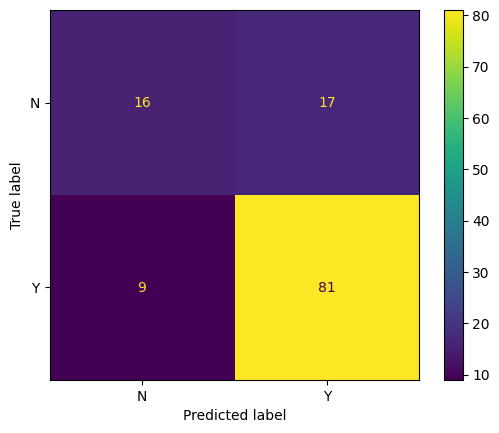

In [41]:
# 2022-11-05 9:21 works
classifiers = {
    'logistic': LogisticRegression(),
    # 'random_forest': RandomForestClassifier()
    }
params = {
    'logistic': {
        'classifier__C': [0.5, 0.75, 1]
        },
    'random_forest': {
        'classifier__max_depth': [3, 4, 5]
        }
    }

grid2 = dict()

for name, classifier in classifiers.items():
    # Create a new pipeline with classifier as last step
    grid_pipeline2 = Pipeline(steps=[
        ('fill_nan', group_mean_impute),
        ('transform', FunctionTransformer(transform_features)), # Get log and calculate total_income
        ('preprocessing', preprocessing2), 
        ('classifier', classifier)
        ])
    # grid_pipeline2.fit(X_test2, y_test2)
    grid2[name] = GridSearchCV(grid_pipeline2, param_grid=params[name])#, error_score='raise')
    grid2[name].fit(X_train2, y_train2)
    evaluate_grid_classifier(grid2[name], X_test2, y_test2,X_train2, y_train2,
        pos_label='N',model_name=name)
    # grid2[name]

# Round 3: Hyperparameter Tuning

In [42]:
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\mini-project-IV\data'
filename = 'data.csv'
df = load_csv(filename, path, column1_as_index=True)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Loan_Status'), df['Loan_Status'], 
    train_size=0.8,random_state=0)

In [44]:
# 2022-11-05 11:21 Same as in round 1
numeric_transform = Pipeline([('impute_mean', SimpleImputer(strategy='mean')), 
                              ('scaling', StandardScaler())])
categorical_fill = ColumnTransformer([
    ('fill_credit_history', SimpleImputer(strategy='constant', fill_value=0), ['Credit_History']), # If credit_history is missing, fill with 0
    ('fill_mode', SimpleImputer(strategy='most_frequent'), ['Self_Employed', 'Gender',
        'Dependents','Married'
    ]),
])

categorical_transform = Pipeline([('impute_categorical', categorical_fill), 
                                  ('one-hot-encode', OneHotEncoder(sparse=False))])

preprocessing = ColumnTransformer([('numeric', numeric_transform, ['LoanAmount_log', 'Total_Income_log', 'Loan_Amount_Term']), 
        ('categorical', categorical_transform, ['Gender',
        'Dependents',
        'Education',
        'Property_Area',
        'Married',
        'Self_Employed',
        'Credit_History'])])



logistic evaluation metrics: 
	Test data	Training data		Difference
Accuracy: 	78.86%		76.58%		2.28%
Recall: 	48.48%		49.69%		-1.20%
Precision: 	64.00%		69.30%		-5.30%
F1: 		55.17%		57.88%		-2.70%
Best model parameters from randomized search: {'classifier__C': 0.008, 'classifier__class_weight': 'balanced', 'classifier__solver': 'liblinear'}

random_forest evaluation metrics: 
	Test data	Training data		Difference
Accuracy: 	78.05%		81.26%		-3.21%
Recall: 	48.48%		61.01%		-12.52%
Precision: 	61.54%		76.38%		-14.84%
F1: 		54.24%		67.83%		-13.59%
Best model parameters from randomized search: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 5, 'classifier__n_estimators': 200}


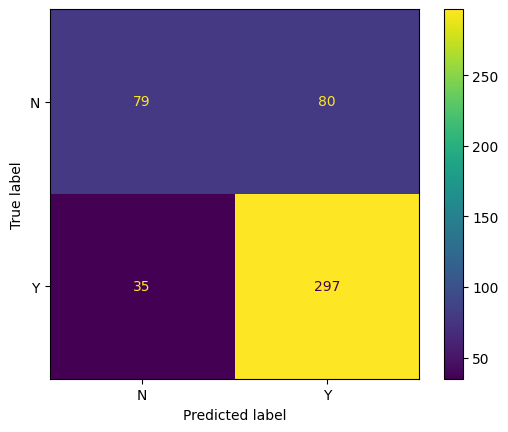

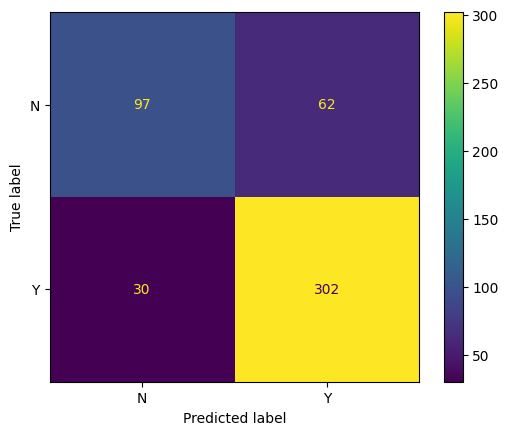

In [64]:
# iterate grid search over multiple estimators
classifiers = {
    'logistic': LogisticRegression(),
    'random_forest': RandomForestClassifier(random_state=0)
    }
params = {
    'logistic': {
        'classifier__C': [0.008, 0.01, 0.012],
        'classifier__class_weight': [None, 'balanced'],
        'classifier__solver': ['lbfgs', 'liblinear']
        },
    'random_forest': {
        'classifier__max_depth': [4, 5, 6],
        'classifier__n_estimators': [200, 300, 400],
        'classifier__class_weight': [None, 'balanced'] 
        }
    }

grid3 = dict()

for name, classifier in classifiers.items():
    # Create a new pipeline with classifier as last step
    grid_pipeline = Pipeline(steps=[
        ('transform', FunctionTransformer(transform_features)), # Get log and calculate total_income
        ('preprocessing', preprocessing), 
        ('classifier', classifier)
        ])
    grid3[name] = GridSearchCV(grid_pipeline, param_grid=params[name])
    grid3[name].fit(X_train, y_train)
    evaluate_grid_classifier(grid3[name], X_test, y_test,X_train, y_train,
        pos_label='N',model_name=name)

### Model selection
Based on above, I infer that:
* The random models are more likely to overfit the training data than the logistical regression models based on differences in evaluation metrics on the test data vs. training data (particularly for recall, precision, F1, but also for accuracy).
* For logistic regression, tuning of the hyperparameters C, class weight, and solver did not appear to impact model performance.

As a result, I will move forward with the hyperparameter-tuned logistic regression model.

In [65]:
grid3['logistic']

GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        FunctionTransformer(func=<function transform_features at 0x000002072DD04670>)),
                                       ('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute_mean',
                                                                                          SimpleImputer()),
                                                                                         ('scaling',
                                                                                          StandardScaler())]),
                                                                         ['LoanAmount_log',
                                                                          'Total_Income_log',
                                                                          'Loan_Amount_Term']),
                                                                        ('categorical',
                                                                         Pipeline(s...
                                                                                                                            'Dependents',
                                                                                                                            'Married'])])),
                                                                                         ('one-hot-encode',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         ['Gender',
                                                                          'Dependents',
                                                                          'Education',
                                                                          'Property_Area',
                                                                          'Married',
                                                                          'Self_Employed',
                                                                          'Credit_History'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.008, 0.01, 0.012],
                         'classifier__class_weight': [None, 'balanced'],
                         'classifier__solver': ['lbfgs', 'liblinear']})

In [66]:
grid3['logistic'].best_estimator_

Pipeline(steps=[('transform',
                 FunctionTransformer(func=<function transform_features at 0x000002072DD04670>)),
                ('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['LoanAmount_log',
                                                   'Total_Income_log',
                                                   'Loan_Amount_Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_categori...
                                                                                                    ['Credit_History']),
                                                                                                   ('fill_mode',
                                                                                                    SimpleImputer(strategy='most_frequent'),
                                                                                                    ['Self_Employed',
                                                                                                     'Gender',
                                                                                                     'Dependents',
                                                                                                     'Married'])])),
                                                                  ('one-hot-encode',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Dependents',
                                                   'Education', 'Property_Area',
                                                   'Married', 'Self_Employed',
                                                   'Credit_History'])])),
                ('classifier',
                 LogisticRegression(C=0.008, class_weight='balanced',
                                    solver='liblinear'))])

In [69]:
# Save the model
model = grid3['logistic']
path=r'C:\Users\silvh\OneDrive\lighthouse\projects\mini-project-IV'
filename = 'model_logistic_regression.sav'
savepickle(model,filename,path=path, append_version=False)


File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/mini-project-IV/model_logistic_regression.sav


## Test Deployment

In [73]:
json_data = X_test.iloc[9,:].to_dict()
json_data

{'Gender': 'Male',
 'Married': 'Yes',
 'Dependents': '0',
 'Education': 'Graduate',
 'Self_Employed': 'No',
 'ApplicantIncome': 2083,
 'CoapplicantIncome': 3150.0,
 'LoanAmount': 128.0,
 'Loan_Amount_Term': 360.0,
 'Credit_History': 1.0,
 'Property_Area': 'Semiurban'}

In [76]:
import requests
URL = "http://127.0.0.1:5000/predict"
# sending get request and saving the response as response object 

r = requests.post(url = URL, json = json_data) 
r.json()

['Y', {'Meaning of prediction': 'Loan application approval. ☺'}]

## Deployment

In [77]:
URL = "http://ec2-34-229-145-28.compute-1.amazonaws.com:6000/predict"

r = requests.post(url = URL, json = json_data) 
r.json()

['Y', {'Meaning of prediction': 'Loan application approval. ☺'}]

# End